---
# 01 Boston 주택 가격 예측 모델
---

---
##  1) 데이터 로드 및 전처리
---

In [3]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [28]:
# boston_housing 데이터셋을 로드
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


Text(0.5, 1.0, 'test')

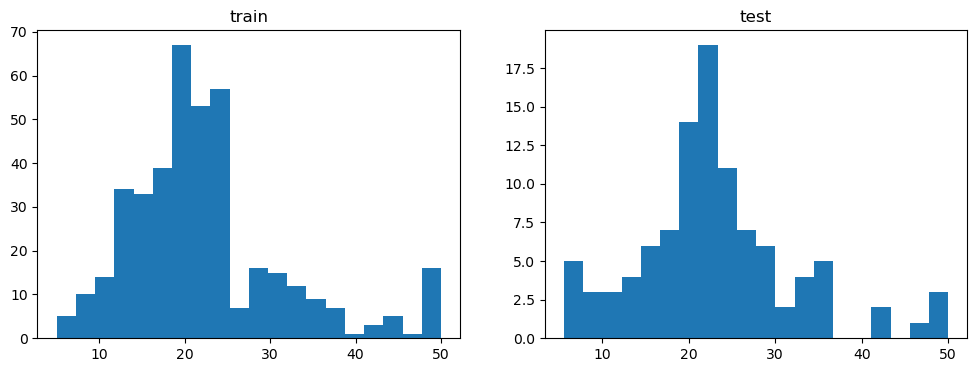

In [15]:
# 분포 확인
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(train_targets, bins=20)
plt.title('train')
plt.subplot(122)
plt.hist(test_targets, bins=20)
plt.title('test')

In [29]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
test_data = test_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = test_data.std(axis=0)
train_data = test_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

---
## 2) 모델 구성 및 컴파일
---

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()


model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])          

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
from tensorflow.keras import models, utils

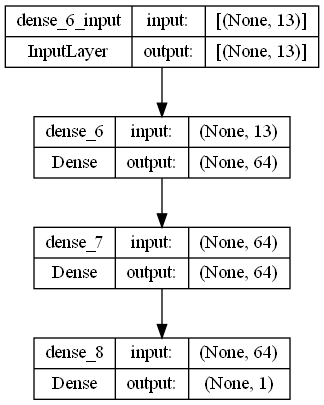

In [24]:
from tensorflow.keras import models, utils
utils.plot_model(model, show_shapes=True, show_layer_names=True)

---
## 3) 모델 학습
---

In [31]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, 
                    epochs=300, 
                    validation_split=0.2)

Epoch 1/300
3/3 [==============================] - 2s 169ms/step - loss: 465.2073 - mae: 19.8397 - val_loss: 971.7123 - val_mae: 28.9364
Epoch 2/300
3/3 [==============================] - 0s 32ms/step - loss: 454.0519 - mae: 19.5460 - val_loss: 955.6626 - val_mae: 28.6695
Epoch 3/300
3/3 [==============================] - 0s 36ms/step - loss: 442.6440 - mae: 19.2483 - val_loss: 939.4050 - val_mae: 28.3969
Epoch 4/300
3/3 [==============================] - 0s 35ms/step - loss: 431.1147 - mae: 18.9397 - val_loss: 922.6397 - val_mae: 28.1138
Epoch 5/300
3/3 [==============================] - 0s 28ms/step - loss: 418.9714 - mae: 18.6149 - val_loss: 904.8405 - val_mae: 27.8100
Epoch 6/300
3/3 [==============================] - 0s 32ms/step - loss: 407.0531 - mae: 18.2812 - val_loss: 885.8018 - val_mae: 27.4812
Epoch 7/300
3/3 [==============================] - 0s 80ms/step - loss: 393.9713 - mae: 17.9114 - val_loss: 865.3858 - val_mae: 27.1253
Epoch 8/300
3/3 [==============================

3/3 [==============================] - 0s 31ms/step - loss: 60.9453 - mae: 5.7742 - val_loss: 283.2292 - val_mae: 13.0870
Epoch 62/300
3/3 [==============================] - 0s 30ms/step - loss: 60.5441 - mae: 5.7331 - val_loss: 286.2746 - val_mae: 13.1843
Epoch 63/300
3/3 [==============================] - 0s 31ms/step - loss: 60.3141 - mae: 5.6886 - val_loss: 288.8915 - val_mae: 13.2737
Epoch 64/300
3/3 [==============================] - 0s 30ms/step - loss: 59.8032 - mae: 5.6377 - val_loss: 290.1065 - val_mae: 13.3147
Epoch 65/300
3/3 [==============================] - 0s 32ms/step - loss: 59.4673 - mae: 5.6224 - val_loss: 289.1911 - val_mae: 13.2816
Epoch 66/300
3/3 [==============================] - 0s 30ms/step - loss: 58.9546 - mae: 5.6008 - val_loss: 289.2695 - val_mae: 13.2796
Epoch 67/300
3/3 [==============================] - 0s 31ms/step - loss: 58.6889 - mae: 5.5862 - val_loss: 288.8060 - val_mae: 13.2587
Epoch 68/300
3/3 [==============================] - 0s 40ms/step - l

3/3 [==============================] - 0s 33ms/step - loss: 48.3577 - mae: 5.0245 - val_loss: 281.4727 - val_mae: 12.9600
Epoch 122/300
3/3 [==============================] - 0s 40ms/step - loss: 48.1718 - mae: 4.9990 - val_loss: 281.9802 - val_mae: 12.9719
Epoch 123/300
3/3 [==============================] - 0s 29ms/step - loss: 48.1464 - mae: 4.9954 - val_loss: 281.3754 - val_mae: 12.9558
Epoch 124/300
3/3 [==============================] - 0s 31ms/step - loss: 47.9526 - mae: 4.9904 - val_loss: 280.7619 - val_mae: 12.9405
Epoch 125/300
3/3 [==============================] - 0s 35ms/step - loss: 47.7687 - mae: 4.9941 - val_loss: 278.8155 - val_mae: 12.8888
Epoch 126/300
3/3 [==============================] - 0s 34ms/step - loss: 47.6467 - mae: 5.0085 - val_loss: 277.5421 - val_mae: 12.8534
Epoch 127/300
3/3 [==============================] - 0s 30ms/step - loss: 47.5854 - mae: 5.0209 - val_loss: 276.6243 - val_mae: 12.8295
Epoch 128/300
3/3 [==============================] - 0s 32ms/s

3/3 [==============================] - 0s 35ms/step - loss: 42.0810 - mae: 4.6710 - val_loss: 271.2079 - val_mae: 12.5966
Epoch 182/300
3/3 [==============================] - 0s 37ms/step - loss: 41.9899 - mae: 4.6829 - val_loss: 270.3652 - val_mae: 12.5701
Epoch 183/300
3/3 [==============================] - 0s 34ms/step - loss: 42.0920 - mae: 4.7064 - val_loss: 269.0914 - val_mae: 12.5394
Epoch 184/300
3/3 [==============================] - 0s 41ms/step - loss: 41.9532 - mae: 4.7104 - val_loss: 269.6497 - val_mae: 12.5522
Epoch 185/300
3/3 [==============================] - 0s 29ms/step - loss: 41.7739 - mae: 4.6938 - val_loss: 270.8102 - val_mae: 12.5722
Epoch 186/300
3/3 [==============================] - 0s 28ms/step - loss: 41.6547 - mae: 4.6821 - val_loss: 271.6838 - val_mae: 12.5888
Epoch 187/300
3/3 [==============================] - 0s 31ms/step - loss: 41.5814 - mae: 4.6645 - val_loss: 273.9108 - val_mae: 12.6439
Epoch 188/300
3/3 [==============================] - 0s 42ms/s

3/3 [==============================] - 0s 35ms/step - loss: 36.9382 - mae: 4.4352 - val_loss: 265.4788 - val_mae: 12.3629
Epoch 242/300
3/3 [==============================] - 0s 38ms/step - loss: 36.8354 - mae: 4.4251 - val_loss: 266.3351 - val_mae: 12.3782
Epoch 243/300
3/3 [==============================] - 0s 30ms/step - loss: 36.7550 - mae: 4.4176 - val_loss: 267.5691 - val_mae: 12.4033
Epoch 244/300
3/3 [==============================] - 0s 35ms/step - loss: 36.6231 - mae: 4.4032 - val_loss: 267.8663 - val_mae: 12.4083
Epoch 245/300
3/3 [==============================] - 0s 34ms/step - loss: 36.5994 - mae: 4.3968 - val_loss: 269.2117 - val_mae: 12.4398
Epoch 246/300
3/3 [==============================] - 0s 30ms/step - loss: 36.5003 - mae: 4.3821 - val_loss: 269.2403 - val_mae: 12.4423
Epoch 247/300
3/3 [==============================] - 0s 29ms/step - loss: 36.3688 - mae: 4.3645 - val_loss: 270.7690 - val_mae: 12.4779
Epoch 248/300
3/3 [==============================] - 0s 33ms/s

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14440\2298012734.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


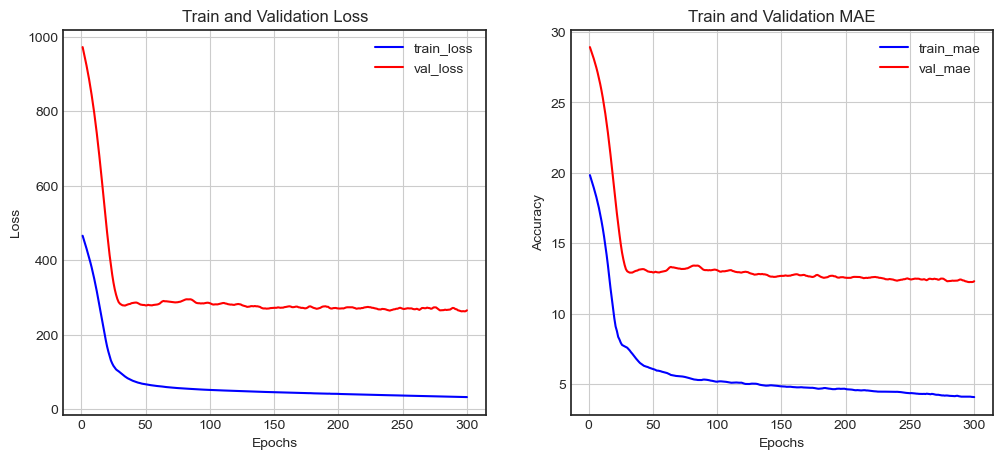

In [32]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history


loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

---
## 4) 모델 평가 및 예측
---

In [33]:
test_mse, test_mae = model.evaluate(test_data, test_labels)
print(f"평균 제곱 오차(MSE) 점수: {test_mse}")
print(f"평균 절대 오차(MAE) 점수: {test_mae}")

4/4 [==============================] - 0s 5ms/step - loss: 3779.0359 - mae: 60.5105
평균 제곱 오차(MSE) 점수: 3779.035888671875
평균 절대 오차(MAE) 점수: 60.51045608520508


In [34]:
model.predict(test_data)

4/4 [==============================] - 0s 4ms/step


array([[63.1379  ],
       [93.61773 ],
       [92.93293 ],
       [88.18528 ],
       [96.57424 ],
       [93.02836 ],
       [75.899315],
       [85.09321 ],
       [78.47503 ],
       [87.64356 ],
       [79.406944],
       [87.09791 ],
       [80.52677 ],
       [85.52981 ],
       [82.38259 ],
       [82.028015],
       [92.00732 ],
       [95.757515],
       [86.75472 ],
       [82.62731 ],
       [77.92008 ],
       [80.18606 ],
       [95.34453 ],
       [80.15719 ],
       [73.060616],
       [89.58645 ],
       [86.25837 ],
       [68.00787 ],
       [69.50923 ],
       [91.10935 ],
       [93.70591 ],
       [70.38384 ],
       [80.10706 ],
       [92.33301 ],
       [85.89651 ],
       [72.55382 ],
       [80.86248 ],
       [84.51208 ],
       [86.60368 ],
       [70.96676 ],
       [75.80366 ],
       [93.09867 ],
       [80.18308 ],
       [88.43247 ],
       [96.53332 ],
       [93.39382 ],
       [81.46664 ],
       [90.00437 ],
       [85.32507 ],
       [91.16225 ],


---
# 02  Reuters 딥러닝 모델
---

---
## 1) 데이터 로드 및 전처리
---

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [51]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

from keras.datasets import reuters
from sklearn.model_selection import train_test_split
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, 
                                                                  test_size=0.25, 
                                                                  random_state=42)

print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [52]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

---
## 2) 모델 구성 및 컴파일
---

In [77]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.3))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               1280128   
                                                                 
 batch_normalization_14 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 activation_14 (Activation)  (None, 128)               0         
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_15 (Ba  (None, 128)               512       
 tchNormalization)                                   

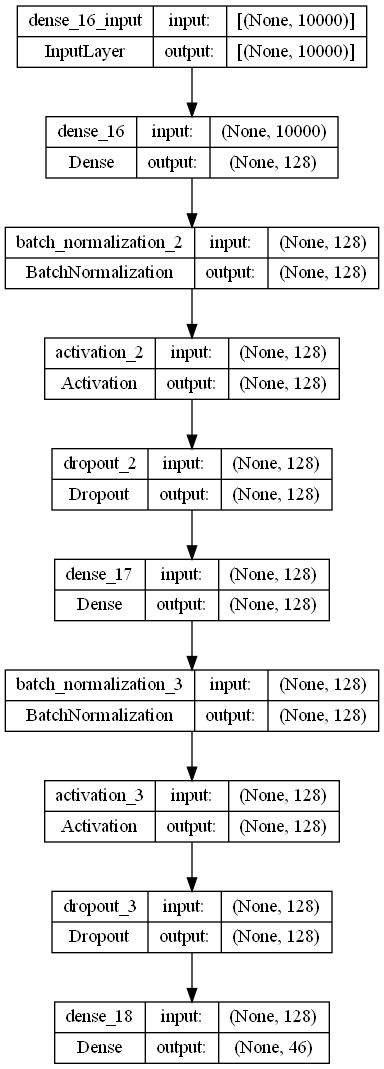

In [48]:
from tensorflow.keras import models, utils
utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [78]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

---
## 3) 모델 학습
---

In [79]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('reuters_model.keras', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 [==============================] - 14s 37ms/step - loss: 1.8965 - accuracy: 0.5809 - val_loss: 2.4329 - val_accuracy: 0.7093
Epoch 2/60
211/211 [==============================] - 6s 27ms/step - loss: 1.1040 - accuracy: 0.7427 - val_loss: 1.1360 - val_accuracy: 0.7729
Epoch 3/60
211/211 [==============================] - 6s 28ms/step - loss: 0.8015 - accuracy: 0.8043 - val_loss: 1.0280 - val_accuracy: 0.7921
Epoch 4/60
211/211 [==============================] - 6s 27ms/step - loss: 0.6485 - accuracy: 0.8446 - val_loss: 1.0040 - val_accuracy: 0.8005
Epoch 5/60
211/211 [==============================] - 6s 28ms/step - loss: 0.5171 - accuracy: 0.8737 - val_loss: 0.9869 - val_accuracy: 0.8059
Epoch 6/60
211/211 [==============================] - 6s 27ms/step - loss: 0.4339 - accuracy: 0.8884 - val_loss: 0.9920 - val_accuracy: 0.8063
Epoch 7/60
211/211 [==============================] - 6s 26ms/step - loss: 0.3666 - accuracy: 0.9034 - val_loss: 1.0088 - val_accuracy: 0.807

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14440\1201330491.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


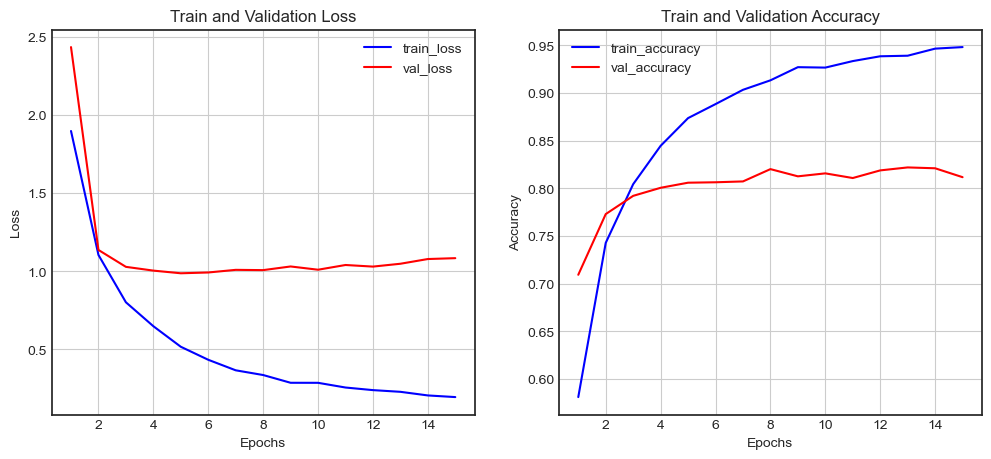

In [80]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

---
## 4) 모델 평가 및 예측
---

In [81]:
loss, acc = model.evaluate(x_test, y_test)
print(f"손실값: {loss}")
print(f"정확도: {acc}")

71/71 [==============================] - 1s 7ms/step - loss: 1.0574 - accuracy: 0.7894
손실값: 1.0574270486831665
정확도: 0.7894033789634705


---
# 03 CIFAR10 딥러닝 모델
---

---
## 1) 데이터 로드 및 전처리
---

In [88]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [104]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, 
                                                  test_size=0.2,
                                                  random_state=42)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [105]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14440\2459113801.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


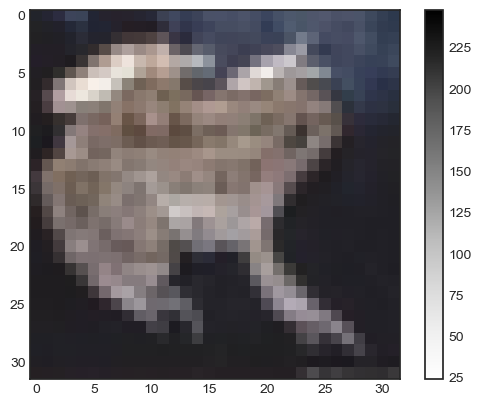

In [106]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [107]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [93]:
# Convolutional layers 사용을 위해 변경하지 않음

# # 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형
# x_train = x_train.reshape(x_train.shape[0], -1)
# x_val = x_val.reshape(x_val.shape[0], -1)
# x_test = x_test.reshape(x_test.shape[0], -1)

# print(x_train.shape)
# print(x_val.shape)
# print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [108]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

---
## 2) 모델 구성 및 컴파일
---

In [109]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

# CNN 층 추가함

model = models.Sequential()
input_shape = (32, 32, 3)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(2048, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)      

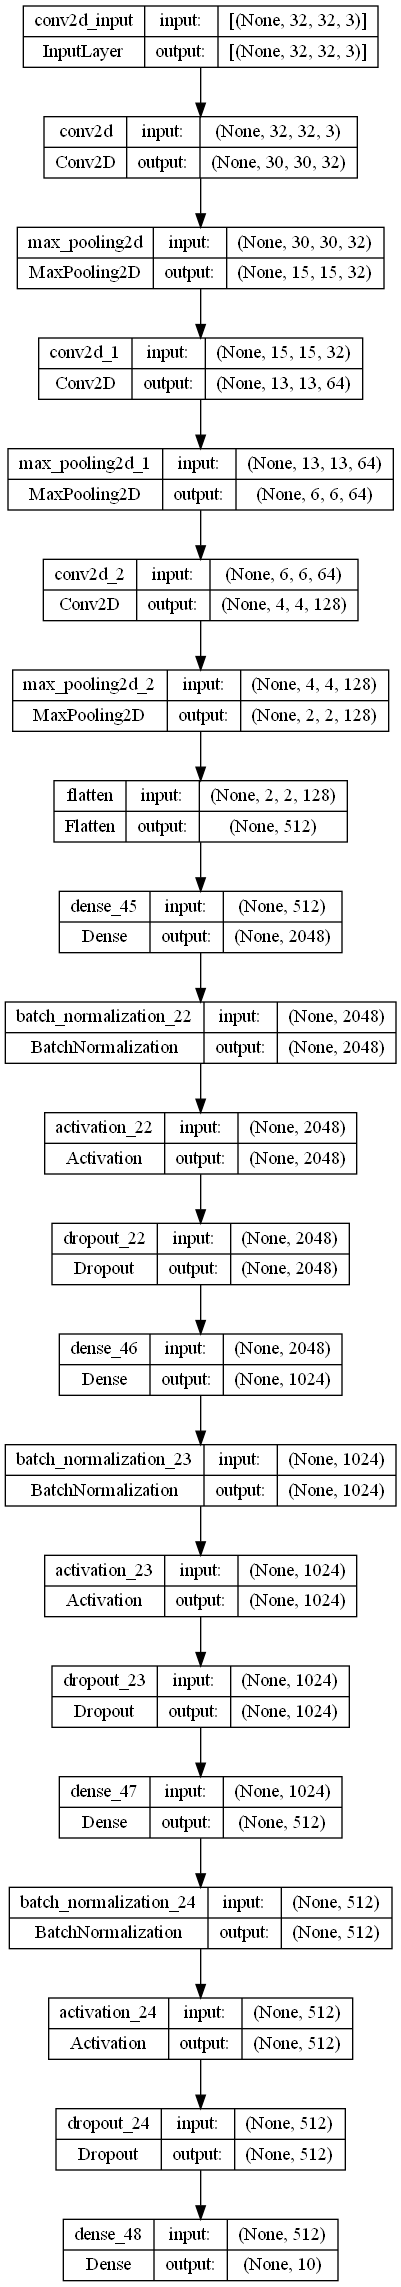

In [110]:
from tensorflow.keras import models, utils
utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [111]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

---
## 3) 모델 학습
---

In [112]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cipar_model.keras', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/50
1250/1250 [==============================] - 172s 130ms/step - loss: 1.9282 - accuracy: 0.3289 - val_loss: 1.7900 - val_accuracy: 0.3704
Epoch 2/50
1250/1250 [==============================] - 151s 121ms/step - loss: 1.4688 - accuracy: 0.4788 - val_loss: 2.5482 - val_accuracy: 0.3473
Epoch 3/50
1250/1250 [==============================] - 157s 126ms/step - loss: 1.2659 - accuracy: 0.5547 - val_loss: 1.2241 - val_accuracy: 0.5553
Epoch 4/50
1250/1250 [==============================] - 162s 130ms/step - loss: 1.1445 - accuracy: 0.5992 - val_loss: 1.5088 - val_accuracy: 0.5036
Epoch 5/50
1250/1250 [==============================] - 122s 97ms/step - loss: 1.0472 - accuracy: 0.6324 - val_loss: 1.2985 - val_accuracy: 0.5723
Epoch 6/50
1250/1250 [==============================] - 171s 137ms/step - loss: 0.9770 - accuracy: 0.6610 - val_loss: 1.0493 - val_accuracy: 0.6555
Epoch 7/50
1250/1250 [==============================] - 127s 101ms/step - loss: 0.9304 - accuracy: 0.6783 - val_l

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14440\4292030210.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


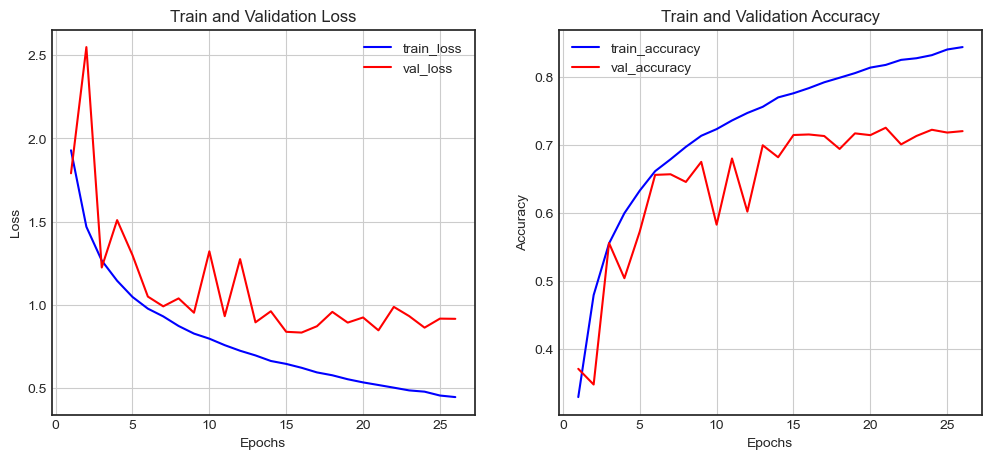

In [113]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [114]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.8250 - accuracy: 0.7191


[0.8250484466552734, 0.7190999984741211]